In [ ]:
# #!/usr/bin/env python
# # -*- coding: utf-8 -*- 


# """--------------------------------------------------------------------
# REINFORCEMENT LEARNING

# Started on the 25/08/2017


# theo.alves.da.costa@gmail.com
# https://github.com/theolvs
# ------------------------------------------------------------------------
# """

# import os
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np 
# import sys
# import random
# import time
# import random
# import numpy as np

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

# from rl.memory import Memory

# class Agent(object):
#     def __init__(self):
#         pass


#     def expand_state_vector(self,state):
#         if len(state.shape) == 1 or len(state.shape)==3:
#             return np.expand_dims(state,axis = 0)
#         else:
#             return state



#     def remember(self,*args):
#         self.memory.save(args)

# class QAgent(Agent):
#     def __init__(self,states_size,actions_size,epsilon = 1.0,epsilon_min = 0.01,epsilon_decay = 0.999,gamma = 0.95,lr = 0.8):
#         self.states_size = states_size
#         self.actions_size = actions_size
#         self.epsilon = epsilon
#         self.epsilon_min = epsilon_min
#         self.epsilon_decay = epsilon_decay
#         self.gamma = gamma
#         self.lr = lr
#         self.Q = self.build_model(states_size,actions_size)


#     def build_model(self,states_size,actions_size):
#         Q = np.zeros([states_size,actions_size])
#         return Q


#     def train(self,s,a,r,s_next):
#         self.Q[s,a] = self.Q[s,a] + self.lr * (r + self.gamma*np.max(self.Q[s_next,a]) - self.Q[s,a])

#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay


#     def act(self,s):

#         q = self.Q[s,:]

#         if np.random.rand() > self.epsilon:
#             a = np.argmax(q)
#         else:
#             a = np.random.randint(self.actions_size)

#         return a

# class DQNAgentTSP(Agent):
#     def __init__(self,states_size,actions_size,epsilon = 1.0,epsilon_min = 0.01,epsilon_decay = 0.995,gamma = 0.95,lr = 0.001,low = 0,high = 1,max_memory = 2000,observation_type = "discrete"):
#         assert observation_type in ["discrete","continuous"]
#         self.states_size = states_size
#         self.actions_size = actions_size
#         self.memory = Memory(max_memory = max_memory)
#         self.epsilon = epsilon
#         self.low = low
#         self.high = high
#         self.observation_type = observation_type
#         self.epsilon_min = epsilon_min
#         self.epsilon_decay = epsilon_decay
#         self.gamma = gamma
#         self.lr = lr
#         self.model = self.build_model(states_size,actions_size)

#     def build_model(self,states_size,actions_size):
#         model = Sequential()
#         model.add(Dense(24,input_dim = states_size,activation = "relu"))
#         model.add(Dense(24,activation = "relu"))
#         model.add(Dense(actions_size,activation = "linear"))
#         model.compile(loss='mse',
#                       optimizer=Adam(lr=self.lr))
#         return model

#     def train(self,batch_size = 32):
#         if len(self.memory.cache) > batch_size:
#             batch = random.sample(self.memory.cache, batch_size)
#         else:
#             batch = self.memory.cache

#         for state,action,reward,next_state,done in batch:
#             state = self.expand_state_vector(state)
#             next_state = self.expand_state_vector(next_state)


#             targets = self.model.predict(state)

#             if not done:
#                 target = reward + self.gamma * np.max(self.model.predict(next_state))
#             else:
#                 target = reward

#             targets[0][action] = target

#             self.model.fit(state,targets,epochs = 1,verbose = 0)


#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay

#     def act(self,state):
#         state = self.expand_state_vector(state)


#         if np.random.rand() > self.epsilon:
#             q = self.model.predict(state)

#             if self.observation_type == "discrete":
#                 a = np.argmax(q[0])
#             elif self.observation_type == "continuous":
#                 a = np.squeeze(np.clip(q,self.low,self.high))

#         else:
#             if self.observation_type == "discrete":
#                 a = np.random.randint(self.actions_size)
#             elif self.observation_type == "continuous":
#                 a = np.random.uniform(self.low,self.high,self.actions_size)
#         return a 

# class DeliveryQAgent(QAgent):

#     def __init__(self,*args,**kwargs):
#         super().__init__(*args,**kwargs)
#         self.reset_memory()

#     def act(self,s):

#         # Get Q Vector
#         q = np.copy(self.Q[s,:])

#         # Avoid already visited states
#         q[self.states_memory] = -np.inf

#         if np.random.rand() > self.epsilon:
#             a = np.argmax(q)
#         else:
#             a = np.random.choice([x for x in range(self.actions_size) if x not in self.states_memory])

#         return a


#     def remember_state(self,s):
#         self.states_memory.append(s)

#     def reset_memory(self):
#         self.states_memory = []



# def run_n_episodes(env,agent,name="training.gif",n_episodes=1000,render_each=10,fps=10):

#     # Store the rewards
#     rewards = []
#     imgs = []

#     # Experience replay
#     for i in tqdm_notebook(range(n_episodes)):

#         # Run the episode
#         env,agent,episode_reward = run_episode(env,agent,verbose = 0)
#         rewards.append(episode_reward)
        
#         if i % render_each == 0:
#             img = env.render(return_img = True)
#             imgs.append(img)

#     # Show rewards
#     plt.figure(figsize = (15,3))
#     plt.title("Rewards over training")
#     plt.plot(rewards)
#     plt.show()

#     # Save imgs as gif
#     imageio.mimsave(name,imgs,fps = fps)

#     return env,agent


# class DeliveryQAgent(QAgent):

#     def __init__(self,*args,**kwargs):
#         super().__init__(*args,**kwargs)
#         self.reset_memory()

#     def act(self,s):

#         # Get Q Vector
#         q = np.copy(self.Q[s,:])

#         # Avoid already visited states
#         q[self.states_memory] = -np.inf

#         if np.random.rand() > self.epsilon:
#             a = np.argmax(q)
#         else:
#             a = np.random.choice([x for x in range(self.actions_size) if x not in self.states_memory])

#         return a


#     def remember_state(self,s):
#         self.states_memory.append(s)

#     def reset_memory(self):
#         self.states_memory = []


In [62]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist



# Define the environment
class TSPEnv(gym.Env):
  def __init__(self, n_cities=4, show_debug_data = False):
    self.n_cities = n_cities
    # self.xy = (np.random.rand(self.n_cities,2)*100).round(2)
    self.xy = np.array([[20.01, 80.01], [10.01, 50.01],[50.01, 30.01],[80.01 , 80.01]])
    self.x=self.xy[:,0]
    self.y=self.xy[:,1]
    self.step_counter = 0
    self.show_debug_data = show_debug_data
    self._array_visited = np.zeros(self.n_cities)
    self._total_distance = 0

    #print(f'genrated stops xy: {self.xy}')
    self.distance_matrix = cdist(self.xy,self.xy,'euclidean').round(0)
    # print(self.distance_matrix.shape)

    self.current_city = np.random.randint(n_cities)
    self.visited_cities = [self.current_city]
    self._array_visited[self.current_city] = 1
    self.remaining_cities = [i for i in range(n_cities)]
    self.cities_list = [i for i in range(n_cities)]
    self.remaining_cities.remove(self.current_city)
    # Define the action space
    self.action_space = gym.spaces.Discrete(n_cities)

    high = np.array(
      [
        np.zeros(4),
        np.zeros(4),
      ],
      dtype=np.int32,
    )

    # Define the observation space
    self.observation_space = gym.spaces.Box(-high, high, dtype=np.int32)
    #self.observation_space = gym.spaces.MultiBinary(n_cities)

    if(self.show_debug_data):
        print(f'Current city in init: {self.current_city}')
        print(f'Remaining city in init: {self.remaining_cities}')
        print(f'Visited city in init: {self.visited_cities}')
        print(f'Stepcounter in init: {self.step_counter}')
        print(f'Observation in init: {self._array_visited}')

  def reset(self):
    self.step_counter = 0
    self._total_distance = 0
    self._array_visited = np.zeros(self.n_cities)
    self.current_city = np.random.randint(self.n_cities)
    self._array_visited[self.current_city] = 1
    self.visited_cities = [self.current_city]
    self.remaining_cities = [i for i in range(self.n_cities)]
    self.remaining_cities.remove(self.current_city)
    
    if(self.show_debug_data):
      print(f'Observation in Reset: {self._array_visited}')
    return self._get_observation()

  def step(self, action):
    done = False
    self.step_counter += 1
    reward = -999

    if(self.show_debug_data):
      print(f'Action in Step(top): {action}')
      print(f'Remaining-City Step(top): {self.remaining_cities}')
      print(f'Observation in step: {self._array_visited}')
    
    if (action in self.remaining_cities):
      if(self.show_debug_data):
        print('Action True')
      
      reward = -self.distance_matrix[self.current_city][action]
      self._total_distance += reward

      self.remaining_cities.remove(action)
      self.visited_cities.append(action)
      self._array_visited[action] = 1
      self.current_city = action

      if (len(self.remaining_cities) == 0):
        startingpoint = self.visited_cities[0]
        self.visited_cities.append(startingpoint)
        reward += -self.distance_matrix[self.current_city][startingpoint]
        done = True
      
      if(self.show_debug_data):
        print(f'Action in step: {action}')
        print(f'Reward in step: {reward}')
        print(f'Current city in step: {self.current_city}')
        print(f'Remaining city in step: {self.remaining_cities}')
        print(f'Visited city in step: {self.visited_cities}')
        print(f'Stepcounter in step: {self.step_counter}')
        print(f'Observation in step: {self._array_visited}')
      
      return self._get_observation(), reward, done, {}
    else:
        return self._get_observation(), reward, False, {}



  def _get_observation(self):
    observation = self.distance_matrix[self.current_city]
    # observation[self.current_city] = 1
    # return observation
    
    return np.array([self._array_visited, observation])

  
  def _test_distance(self,CurrentCity, NextCity):
    return -self.distance_matrix[CurrentCity][NextCity]
    
  def plotCities(self):
    fig, ax = plt.subplots(1, figsize=(7,7))
    fig.suptitle = "Delivery Stops"
    plt.scatter(self.x,self.y)
    xcoord = []
    ycoord = []
    for i in range(0,len(self.visited_cities)):
      xcoord.append(self.x[self.visited_cities[i]])
      ycoord.append(self.y[self.visited_cities[i]])
      if(i == 0):
        ax.annotate("Anfang", xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))
      ax.annotate(str(i), xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))

    plt.plot(xcoord, ycoord)



[[ 0.  1.  0.  0.]
 [32.  0. 45. 76.]]
----------
[1, 0, 2, 3, 1]


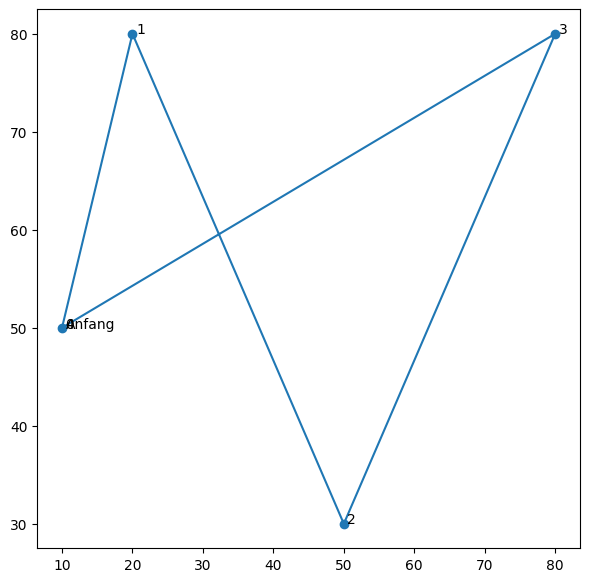

In [56]:
env = TSPEnv(4,False)
print(env.reset())

print('----------')
for i in range(0,env.n_cities):
    env.step(i)
print(env.visited_cities)    
env.plotCities()

In [66]:
import random
import numpy as np
from collections import deque

import torch
import torch.nn as nn
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the DQN model
class DQN(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.fc1 = nn.Linear(4, 4)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(4, 4)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(4, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    return x


# Define the DQNAgent
class DQNAgent:
  def __init__(self, env, epsilon=0.20, epsilon_decay=0.995, epsilon_min=0.01, 
               alpha=1e-3, alpha_decay=0.01, gamma=0.99, memory_size=10000, 
               batch_size=64):
    self.env = env
    self.epsilon = epsilon
    self.epsilon_decay = epsilon_decay
    self.epsilon_min = epsilon_min
    self.alpha = alpha
    self.alpha_decay = alpha_decay
    self.gamma = gamma
    self.memory = deque(maxlen=memory_size)
    self.batch_size = batch_size

    # Define the model and the target model
    self.model = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
    self.target_model = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
    self.target_model.load_state_dict(self.model.state_dict())

    # Define the optimizer
    self.optimizer = optim.Adam(self.model.parameters(), lr=alpha)

    # Define the loss function
    self.loss_fn = nn.MSELoss()

  def remember(self, state, action, reward, next_state, done):
    if(reward > -3000):
      self.memory.append((state, action, reward, next_state, done))

  def act(self, state):
    if np.random.rand() <= self.epsilon:
      # print('Random move')
      return self.env.action_space.sample()
    else:
      # print('Intended Move')
      state = torch.from_numpy(state).float().to(device)
      q_values = self.model(state)
      return q_values.argmax().item()

  def update(self):
    # Don't update if there are not enough samples in the memory
    if len(self.memory) < self.batch_size:
      return

    # Sample a batch from the memory
    samples = random.sample(self.memory, self.batch_size)
  

    # Split the batch into separate variables
    states, actions, rewards, next_states, dones = zip(*samples)

    # Convert variables to tensors and move them to the device
    states = torch.from_numpy(np.vstack(states)).float().to(device)
    print(f'States shape: {states.shape}')
    actions = torch.from_numpy(np.vstack(actions)).long().to(device)
    print(f'Action Shapes: {actions.shape}')
    rewards = torch.from_numpy(np.vstack(rewards)).float().to(device)
    next_states = torch.from_numpy(np.vstack(next_states)).float().to(device)
    dones = torch.from_numpy(np.vstack(dones)).float().to(device)

    # Calculate the Q values for the current states
    q_values = self.model(states)
    q_values = q_values.gather(1, actions)

    # Calculate the Q values for the next states
    next_q_values = self.target_model(next_states).max(1)[0].unsqueeze(1)

    # Calculate the target Q values
    target_q_values = rewards + (self.gamma * next_q_values * (1 - dones))

    # Calculate the loss
    loss = self.loss_fn(q_values, target_q_values)

    # Perform backpropagation
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()

    # Update the target model
    for target_param, param in zip(self.target_model.parameters(), self.model.parameters()):
      target_param.data.copy_(param.data * (1 - self.alpha_decay) + target_param.data * self.alpha_decay)

    # Update the epsilon value
    self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
  
  def SaveAgent(self, name):
    torch.save(self.model.state_dict(),'model episode'+name+'pt')
    print('Model saved')

In [67]:
import gym
import numpy as np


# Instantiate the environment
env = TSPEnv(4)

# Instantiate the agent
agent = DQNAgent(env)

# Set the number of episodes to run
n_episodes = 200

#lists for learning evaluation
scores = []


# Run the episodes
for episode in range(n_episodes):
  # Reset the environment and get the initial state
  state = env.reset()

  # Set the initial reward to 0
  total_reward = 0
  total_steps = 0
  Route = []

  while True:
    # Take an action
    # print(state.shape)
    # print(state)
    action = agent.act(state)

    # Step the environment
    next_state, reward, done, _ = env.step(action)

    # Remember the experience
    agent.remember(state, action, reward, next_state, done)

    # Update the state and the reward
    state = next_state
    total_reward += reward
    total_steps += 1

    # Update the agent
    agent.update()

    # If the episode is done, break the loop
    if done:
      break
  
  scores.append((episode, total_reward, total_steps,env.visited_cities, env._total_distance, env.xy))
  #env.plotCities()
  # Print the total reward for the episode
  print(f"Episode: {episode+1}, Reward: {total_reward}, Steps needed: {total_steps}, Total Distance: {env._total_distance}, Visited Cities: {env.visited_cities}")

  if episode > 1000:
    agent.SaveAgent(str(episode))
  if episode > 5000:
    agent.SaveAgent(str(episode))
  if episode > 10000:
    agent.SaveAgent(str(episode))

  # Open a file handle in write mode
  with open('my_file.txt', 'w') as f:
      # Write the list to the file, one item per line
      f.writelines([f"{item}\n" for item in scores])



Episode: 1, Reward: -22173.0, Steps needed: 25, Total Distance: -137.0, Visited Cities: [2, 1, 0, 3, 2]
Episode: 2, Reward: -22217.0, Steps needed: 25, Total Distance: -179.0, Visited Cities: [3, 1, 2, 0, 3]
States shape: torch.Size([128, 4])
Action Shapes: torch.Size([64, 1])


RuntimeError: index 1 is out of bounds for dimension 1 with size 1